In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.stats import sem
from matplotlib import rc

In [2]:
rc("font", **{"family": "serif", "serif": ["Times"]})
rc('text', usetex=True)

SINGLE_WIDTH = 246 / 72
DOUBLE_WIDTH = 510 / 72
GOLDEN_RATIO = (5**0.5 - 1) / 2
DATA_DIR = "../data/hardware_data"

# load maxcut N12 

In [3]:
results = pickle.load(open(f'{DATA_DIR}/maxcut/N12_seeds/N12_plist[1, 2, 3, 4, 5]_seeds5_repeat3_H1-2E.pckl','rb'))[0]
results_exact = pickle.load(open(f'{DATA_DIR}/maxcut/N12_seeds/N12_plist[1, 2, 3, 4, 5]_seeds5_repeat1_exact.pckl','rb'))[0]
results_max = pickle.load(open(f'{DATA_DIR}/maxcut/N12_seeds/N12_plist[1, 2, 3, 4, 5]_seeds5_repeat1_exact_maximum.pckl','rb'))[0]
p_lst = pickle.load(open(f'{DATA_DIR}/maxcut/N12_seeds/N12_plist[1, 2, 3, 4, 5]_seeds5_repeat1_exact.pckl','rb'))[1]

In [4]:
ar_noisy = np.zeros(results.shape)
for i_seed in range(results.shape[0]):
    for i_p in range(results.shape[1]):
        for i_repeat in range(results.shape[2]):
            ar_noisy[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimized_ar']
ar_noisy = np.mean(ar_noisy, axis = 2)

ar_initial = np.zeros(results.shape)
ar_exact = np.zeros(results.shape)
ar_max = np.zeros(results.shape)
for i_seed in range(results.shape[0]):
    for i_p in range(results.shape[1]):
        for i_repeat in range(results.shape[2]):
            ar_initial[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['initial_ar']
            ar_exact[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimized_ar']
            ar_max[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimized_ar']
ar_initial = np.mean(ar_initial, axis = 2)
ar_exact = np.mean(ar_exact, axis = 2)
ar_max = np.mean(ar_max, axis = 2)

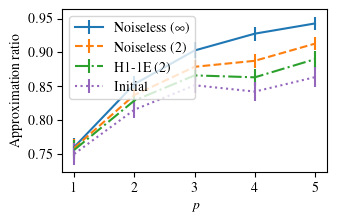

In [5]:
f, ax = plt.subplots(figsize=(SINGLE_WIDTH, SINGLE_WIDTH*GOLDEN_RATIO))
plt.errorbar(p_lst,np.mean(ar_max,axis=(0)),yerr=sem(ar_max,axis=0), color='tab:blue', linestyle='-', label='Noiseless ($\infty$)')
plt.errorbar(p_lst,np.mean(ar_exact,axis=(0)),yerr=sem(ar_exact,axis=0), color='tab:orange', linestyle='--', label='Noiseless (2)')
plt.errorbar(p_lst,np.mean(ar_noisy,axis=(0)),yerr=sem(ar_noisy,axis=0), color='tab:green', linestyle='-.', label='H1-1E (2)')
plt.errorbar(p_lst,np.mean(ar_initial,axis=(0)),yerr=sem(ar_initial,axis=0), color='tab:purple', linestyle=':', label='Initial')

plt.xlabel(r'$p$')
plt.xticks(p_lst)
plt.ylabel('Approximation ratio')
plt.legend(loc='upper left')
plt.show()

# load maxcut N20

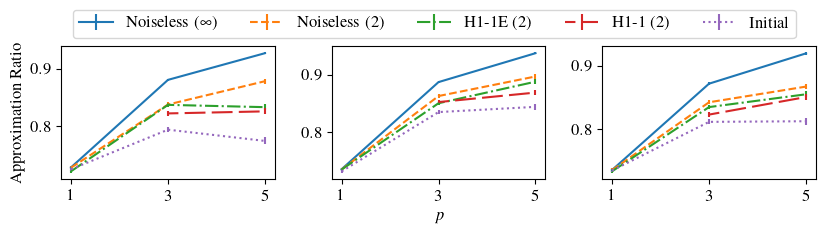

In [6]:
rc('font',**{'family':'serif','serif':['Times'],'size':12}) 
f, axs = plt.subplots(1,3,figsize=(DOUBLE_WIDTH*1.2, DOUBLE_WIDTH*GOLDEN_RATIO/2))
####################################
hw_results = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed743/N20_plist[3, 5]_seed743_repeat1_H1-1_readshot.pckl','rb'))[0]
hw_plist = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed743/N20_plist[3, 5]_seed743_repeat1_H1-1_readshot.pckl','rb'))[1]
results = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed743/N20_plist[1, 3, 5]_seed743_repeat1_H1-1E_readshot.pckl','rb'))[0]
results_exact = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed743/N20_plist[1, 3, 5]_seed743_repeat1_exact.pckl','rb'))[0]
results_max = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed743/N20_plist[1, 3, 5]_seed743_repeat1_exact_maximum.pckl','rb'))[0]
p_lst = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed743/N20_plist[1, 3, 5]_seed743_repeat1_exact.pckl','rb'))[1]
gap = results_exact[0][0,0]['maxval'] - results_exact[0][0,0]['minval']

n_shot = np.zeros(results.shape)
ar_noisy, energy_noisy_std = np.zeros(results.shape), np.zeros(results.shape)
for i_seed in range(results.shape[0]):
    for i_p in range(results.shape[1]):
        for i_repeat in range(results.shape[2]):
            ar_noisy[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimized_ar']
            energy_noisy_std[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimal_value_std']
            n_shot[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['shots']
ar_noisy = np.mean(ar_noisy, axis = 2)
energy_noisy_std = np.mean(energy_noisy_std, axis = 2)[0]
n_shot = np.mean(n_shot, axis=2)[0]

ar_hw, energy_hw_std = np.zeros(hw_results.shape), np.zeros(hw_results.shape)
for i_seed in range(hw_results.shape[0]):
    for i_p in range(hw_results.shape[1]):
        for i_repeat in range(hw_results.shape[2]):
            ar_hw[i_seed,i_p,i_repeat] = hw_results[i_seed,i_p,i_repeat]['exact_optimized_ar']
            energy_hw_std[i_seed,i_p,i_repeat] = hw_results[i_seed,i_p,i_repeat]['exact_optimal_value_std']
ar_hw = np.mean(ar_hw, axis = 2)
energy_hw_std = np.mean(energy_hw_std, axis = 2)[0]

ar_initial, energy_initial_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
ar_exact, energy_exact_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
ar_max, energy_max_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
for i_seed in range(results_max.shape[0]):
    for i_p in range(results_max.shape[1]):
        for i_repeat in range(results_max.shape[2]):
            ar_initial[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['initial_ar']
            energy_initial_std[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['trace'][0][2]
            ar_exact[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimized_ar']
            energy_exact_std[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimal_value_std']
            ar_max[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimized_ar']
            energy_max_std[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimal_value_std']
ar_initial = np.mean(ar_initial, axis = 2)
energy_initial_std = np.mean(energy_initial_std, axis = 2)[0]
ar_exact = np.mean(ar_exact, axis = 2)
energy_exact_std = np.mean(energy_exact_std, axis = 2)[0]
ar_max = np.mean(ar_max, axis = 2)
energy_max_std = np.mean(energy_max_std, axis = 2)[0]

axs[0].errorbar(p_lst,np.mean(ar_max,axis=(0)),yerr=energy_max_std/np.sqrt(n_shot)/gap,color='tab:blue', linestyle='-', label='Noiseless ($\infty$)')
axs[0].errorbar(p_lst,np.mean(ar_exact,axis=(0)),yerr=energy_exact_std/np.sqrt(n_shot)/gap,color='tab:orange', linestyle='--', label='Noiseless (2)')
axs[0].errorbar(p_lst,np.mean(ar_noisy,axis=(0)),yerr=energy_noisy_std/np.sqrt(n_shot)/gap,color='tab:green', linestyle='-.', label='H1-1E (2)')
axs[0].errorbar(hw_plist,np.mean(ar_hw,axis=(0)),yerr=energy_hw_std/np.sqrt(n_shot[1:])/gap,color='tab:red',linestyle=(5, (10, 3)),label='H1-1 (2)')
axs[0].errorbar(p_lst,np.mean(ar_initial,axis=(0)),yerr=energy_initial_std/np.sqrt(n_shot)/gap, color='tab:purple', linestyle=':', label='Initial')
axs[0].set_xticks(p_lst)
axs[0].set_ylabel('Approximation Ratio')

####################################
hw_results = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed138/N20_plist[3, 5]_seed138_repeat1_H1-1_readshot.pckl','rb'))[0]
hw_plist = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed138/N20_plist[3, 5]_seed138_repeat1_H1-1_readshot.pckl','rb'))[1]
results = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed138/N20_plist[1, 3, 5]_seed138_repeat1_H1-1E_readshot.pckl','rb'))[0]
results_exact = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed138/N20_plist[1, 3, 5]_seed138_repeat1_exact.pckl','rb'))[0]
results_max = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed138/N20_plist[1, 3, 5]_seed138_repeat1_exact_maximum.pckl','rb'))[0]
p_lst = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed138/N20_plist[1, 3, 5]_seed138_repeat1_exact.pckl','rb'))[1]
gap = results_exact[0][0,0]['maxval'] - results_exact[0][0,0]['minval']

n_shot = np.zeros(results.shape)
ar_noisy, energy_noisy_std = np.zeros(results.shape), np.zeros(results.shape)
for i_seed in range(results.shape[0]):
    for i_p in range(results.shape[1]):
        for i_repeat in range(results.shape[2]):
            ar_noisy[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimized_ar']
            energy_noisy_std[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimal_value_std']
            n_shot[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['shots']
ar_noisy = np.mean(ar_noisy, axis = 2)
energy_noisy_std = np.mean(energy_noisy_std, axis = 2)[0]
n_shot = np.mean(n_shot, axis=2)[0]

ar_hw, energy_hw_std = np.zeros(hw_results.shape), np.zeros(hw_results.shape)
for i_seed in range(hw_results.shape[0]):
    for i_p in range(hw_results.shape[1]):
        for i_repeat in range(hw_results.shape[2]):
            ar_hw[i_seed,i_p,i_repeat] = hw_results[i_seed,i_p,i_repeat]['exact_optimized_ar']
            energy_hw_std[i_seed,i_p,i_repeat] = hw_results[i_seed,i_p,i_repeat]['exact_optimal_value_std']
ar_hw = np.mean(ar_hw, axis = 2)
energy_hw_std = np.mean(energy_hw_std, axis = 2)[0]

ar_initial, energy_initial_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
ar_exact, energy_exact_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
ar_max, energy_max_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
for i_seed in range(results_max.shape[0]):
    for i_p in range(results_max.shape[1]):
        for i_repeat in range(results_max.shape[2]):
            ar_initial[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['initial_ar']
            energy_initial_std[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['trace'][0][2]
            ar_exact[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimized_ar']
            energy_exact_std[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimal_value_std']
            ar_max[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimized_ar']
            energy_max_std[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimal_value_std']
ar_initial = np.mean(ar_initial, axis = 2)
energy_initial_std = np.mean(energy_initial_std, axis = 2)[0]
ar_exact = np.mean(ar_exact, axis = 2)
energy_exact_std = np.mean(energy_exact_std, axis = 2)[0]
ar_max = np.mean(ar_max, axis = 2)
energy_max_std = np.mean(energy_max_std, axis = 2)[0]

axs[1].errorbar(p_lst,np.mean(ar_max,axis=(0)),yerr=energy_max_std/np.sqrt(n_shot)/gap,color='tab:blue', linestyle='-', label='Noiseless ($\infty$)')
axs[1].errorbar(p_lst,np.mean(ar_exact,axis=(0)),yerr=energy_exact_std/np.sqrt(n_shot)/gap,color='tab:orange', linestyle='--', label='Noiseless (2)')
axs[1].errorbar(p_lst,np.mean(ar_noisy,axis=(0)),yerr=energy_noisy_std/np.sqrt(n_shot)/gap,color='tab:green', linestyle='-.', label='H1-1E (2)')
axs[1].errorbar(hw_plist,np.mean(ar_hw,axis=(0)),yerr=energy_hw_std/np.sqrt(n_shot[1:])/gap,color='tab:red',linestyle=(5, (10, 3)),label='H1-1 (2)')
axs[1].errorbar(p_lst,np.mean(ar_initial,axis=(0)),yerr=energy_initial_std/np.sqrt(n_shot)/gap, color='tab:purple', linestyle=':', label='Initial')
axs[1].set_xlabel(r'$p$')
axs[1].set_xticks(p_lst)
# axs[1].set_ylabel('Approximation Ratio')
# axs[1].set_title('N=20 (seed 138)')
# axs[1].set_title('N=20 (Instance 2)')

####################################
hw_results = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed253/N20_plist[3, 5]_seed253_repeat1_H1-1_readshot.pckl','rb'))[0]
hw_plist = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed253/N20_plist[3, 5]_seed253_repeat1_H1-1_readshot.pckl','rb'))[1]
results = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed253/N20_plist[1, 3, 5]_seed253_repeat1_H1-1E_readshot.pckl','rb'))[0]
results_exact = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed253/N20_plist[1, 3, 5]_seed253_repeat1_exact.pckl','rb'))[0]
results_max = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed253/N20_plist[1, 3, 5]_seed253_repeat1_exact_maximum.pckl','rb'))[0]
p_lst = pickle.load(open(f'{DATA_DIR}/maxcut/N20_seed253/N20_plist[1, 3, 5]_seed253_repeat1_exact.pckl','rb'))[1]
gap = results_exact[0][0,0]['maxval'] - results_exact[0][0,0]['minval']

n_shot = np.zeros(results.shape)
ar_noisy, energy_noisy_std = np.zeros(results.shape), np.zeros(results.shape)
for i_seed in range(results.shape[0]):
    for i_p in range(results.shape[1]):
        for i_repeat in range(results.shape[2]):
            ar_noisy[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimized_ar']
            energy_noisy_std[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimal_value_std']
            n_shot[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['shots']
ar_noisy = np.mean(ar_noisy, axis = 2)
energy_noisy_std = np.mean(energy_noisy_std, axis = 2)[0]
n_shot = np.mean(n_shot, axis=2)[0]

ar_hw, energy_hw_std = np.zeros(hw_results.shape), np.zeros(hw_results.shape)
for i_seed in range(hw_results.shape[0]):
    for i_p in range(hw_results.shape[1]):
        for i_repeat in range(hw_results.shape[2]):
            ar_hw[i_seed,i_p,i_repeat] = hw_results[i_seed,i_p,i_repeat]['exact_optimized_ar']
            energy_hw_std[i_seed,i_p,i_repeat] = hw_results[i_seed,i_p,i_repeat]['exact_optimal_value_std']
ar_hw = np.mean(ar_hw, axis = 2)
energy_hw_std = np.mean(energy_hw_std, axis = 2)[0]

ar_initial, energy_initial_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
ar_exact, energy_exact_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
ar_max, energy_max_std = np.zeros(results_max.shape), np.zeros(results_max.shape)
for i_seed in range(results_max.shape[0]):
    for i_p in range(results_max.shape[1]):
        for i_repeat in range(results_max.shape[2]):
            ar_initial[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['initial_ar']
            energy_initial_std[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['trace'][0][2]
            ar_exact[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimized_ar']
            energy_exact_std[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimal_value_std']
            ar_max[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimized_ar']
            energy_max_std[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimal_value_std']
ar_initial = np.mean(ar_initial, axis = 2)
energy_initial_std = np.mean(energy_initial_std, axis = 2)[0]
ar_exact = np.mean(ar_exact, axis = 2)
energy_exact_std = np.mean(energy_exact_std, axis = 2)[0]
ar_max = np.mean(ar_max, axis = 2)
energy_max_std = np.mean(energy_max_std, axis = 2)[0]

axs[2].errorbar(p_lst,np.mean(ar_max,axis=(0)),yerr=energy_max_std/np.sqrt(n_shot)/gap,color='tab:blue', linestyle='-', label='Noiseless ($\infty$)')
axs[2].errorbar(p_lst,np.mean(ar_exact,axis=(0)),yerr=energy_exact_std/np.sqrt(n_shot)/gap,color='tab:orange', linestyle='--', label='Noiseless (2)')
axs[2].errorbar(p_lst,np.mean(ar_noisy,axis=(0)),yerr=energy_noisy_std/np.sqrt(n_shot)/gap,color='tab:green', linestyle='-.', label='H1-1E (2)')
axs[2].errorbar(hw_plist,np.mean(ar_hw,axis=(0)),yerr=energy_hw_std/np.sqrt(n_shot[1:])/gap,color='tab:red',linestyle=(5, (10, 3)),label='H1-1 (2)')
axs[2].errorbar(p_lst,np.mean(ar_initial,axis=(0)),yerr=energy_initial_std/np.sqrt(n_shot)/gap, color='tab:purple', linestyle=':', label='Initial')

axs[2].set_xticks(p_lst)

####################################
plt.tight_layout()
handles, labels = axs[2].get_legend_handles_labels()
f.legend(handles,labels,loc='upper center',bbox_to_anchor=(0.53,1.1), ncol=5)
plt.show()

# load maxcut N32

In [7]:
df = pd.read_json(f'{DATA_DIR}/maxcut/N32_seed258_p5/CPLEX_for_weighted_N_32.json', orient='index')
row = df[df['seed']==258].squeeze()
max_cut, min_cut = row['maxcut'], row['mincut']

In [8]:
name = f"""{DATA_DIR}/maxcut/N32_seed258_p5/N32_p5_seed258_repeat1_shot769_H2-1_[0.71727604 1.36994474 1.67388794 1.93810649 2.29470939 0.65957784
 0.51095792 0.41524034 0.26290859 0.1250973 ]_readshot.pckl"""
hw_results_opt = pickle.load(open(name,'rb'))
eval_opt = hw_results_opt['all_eval']

name = f"""{DATA_DIR}/maxcut/N32_seed258_p5/N32_p5_seed258_repeat1_shot769_H2-1_[0.71917881 1.41314521 1.6451131  2.00950979 2.30854916 0.65685203
 0.52265244 0.38974206 0.27541216 0.14917005]_readshot.pckl"""
hw_results_ini = pickle.load(open(name,'rb'))
eval_ini = hw_results_ini['all_eval']

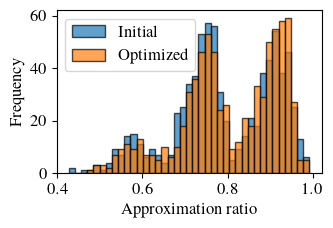

In [9]:
opt_values = np.array(list(eval_opt.keys()))
opt_freq= np.array(list(eval_opt.values()))
new_opt_values = []
for value, frequency in zip(opt_values,opt_freq):
    new_opt_values.extend([value] * frequency)   
ini_values = np.array(list(eval_ini.keys()))
ini_freq = np.array(list(eval_ini.values()))
new_ini_values = []
for value, frequency in zip(ini_values,ini_freq):
    new_ini_values.extend([value] * frequency)
bins = np.linspace((min(min(ini_values), min(opt_values))-min_cut)/(max_cut-min_cut), 1, 40)
f, ax = plt.subplots(figsize=(SINGLE_WIDTH, SINGLE_WIDTH*GOLDEN_RATIO))
plt.hist((new_ini_values-min_cut)/(max_cut-min_cut),bins=bins,edgecolor='black', align='left', alpha=0.7,label='Initial')
plt.hist((new_opt_values-min_cut)/(max_cut-min_cut),bins=bins,edgecolor='black', align='left', alpha=0.7,label='Optimized')
plt.xlabel('Approximation ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# load PO N10

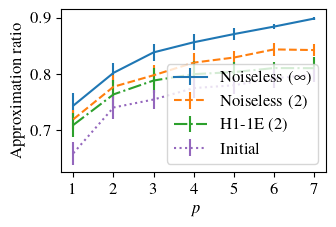

In [10]:
results = pickle.load(open(f'{DATA_DIR}/po/N10_plist[1, 2, 3, 4, 5, 6, 7]_seeds5_repeat1_H1-1E_unfliter_negative.pckl','rb'))[0]
results_exact = pickle.load(open(f'{DATA_DIR}/po/N10_plist[1, 2, 3, 4, 5, 6, 7]_seeds5_repeat1_exact_negative.pckl','rb'))[0]
results_max = pickle.load(open(f'{DATA_DIR}/po/N10_plist[1, 2, 3, 4, 5, 6, 7]_seeds5_repeat1_exact_maximum_negative.pckl','rb'))[0]
p_lst = pickle.load(open(f'{DATA_DIR}/po/N10_plist[1, 2, 3, 4, 5, 6, 7]_seeds5_repeat1_exact_negative.pckl','rb'))[1]

ar_noisy = np.zeros(results.shape)
for i_seed in range(results.shape[0]):
    for i_p in range(results.shape[1]):
        for i_repeat in range(results.shape[2]):
            ar_noisy[i_seed,i_p,i_repeat] = results[i_seed,i_p,i_repeat]['exact_optimized_ar']
ar_noisy = np.mean(ar_noisy, axis = 2)

ar_initial = np.zeros(results_exact.shape)
ar_exact = np.zeros(results_exact.shape)
ar_max = np.zeros(results_exact.shape)
for i_seed in range(results_exact.shape[0]):
    for i_p in range(results_exact.shape[1]):
        for i_repeat in range(results_exact.shape[2]):
            ar_initial[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,i_repeat]['initial_ar']
            ar_exact[i_seed,i_p,i_repeat] = results_exact[i_seed,i_p,0]['exact_optimized_ar']
            ar_max[i_seed,i_p,i_repeat] = results_max[i_seed,i_p,0]['exact_optimized_ar']
ar_initial = np.mean(ar_initial, axis = 2)
ar_exact = np.mean(ar_exact, axis = 2)
ar_max = np.mean(ar_max, axis = 2)

f, ax = plt.subplots(figsize=(SINGLE_WIDTH, SINGLE_WIDTH*GOLDEN_RATIO))
plt.errorbar(p_lst,np.mean(ar_max,axis=(0)),yerr=sem(ar_max,axis=0), color='tab:blue', linestyle='-', label='Noiseless ($\infty$)')
plt.errorbar(p_lst,np.mean(ar_exact,axis=(0)),yerr=sem(ar_exact,axis=0), color='tab:orange', linestyle='--', label='Noiseless (2)')
plt.errorbar(p_lst,np.mean(ar_noisy,axis=(0)),yerr=sem(ar_noisy,axis=0), color='tab:green', linestyle='-.', label='H1-1E (2)')
plt.errorbar(p_lst,np.mean(ar_initial,axis=(0)),yerr=sem(ar_initial,axis=0), color='tab:purple', linestyle=':', label='Initial')
plt.xlabel(r'$p$')
plt.xticks(p_lst)
plt.ylabel('Approximation ratio')
plt.legend(loc=0)
plt.show()